In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
import numpy as np
from collections import Counter
import re
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from collections import Counter

In [ ]:
# Dataset Paths
captions_path = '/kaggle/input/flickr30k/captions.txt'
images_path = '/kaggle/input/flickr30k/images/flickr30k_images'

Loaded 158916 captions.
            image              id  \
0      image_name  caption_number   
1  1000092795.jpg               0   
2  1000092795.jpg               1   
3  1000092795.jpg               2   
4  1000092795.jpg               3   

                                             caption  
0                                       caption_text  
1  Two young guys with shaggy hair look at their ...  
2  Two young , White males are outside near many ...  
3   Two men in green shirts are standing in a yard .  
4       A man in a blue shirt standing in a garden .  


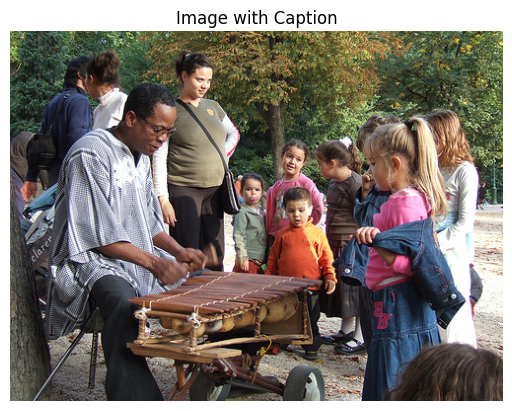

In [1]:
# Load captions
captions = pd.read_csv(captions_path, sep='|', header=None, names=['image', 'id', 'caption'])
print(f"Loaded {len(captions)} captions.")

# Display some captions
print(captions.head())

# Visualize a random image with its captions
random_image = captions.sample(1)['image'].values[0].strip()
image_path = os.path.join(images_path, random_image)
if os.path.exists(image_path):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title("Image with Caption")
    plt.show()
else:
    print(f"Image {image_path} not found!")

In [1]:
# Load captions
captions = pd.read_csv(captions_path, sep='|', header=None, names=['image', 'id', 'caption'])
print(f"Loaded {len(captions)} captions.")

# Display some captions
print(captions.head())

Loaded 158916 captions.
            image              id  \
0      image_name  caption_number   
1  1000092795.jpg               0   
2  1000092795.jpg               1   
3  1000092795.jpg               2   
4  1000092795.jpg               3   

                                             caption  
0                                       caption_text  
1  Two young guys with shaggy hair look at their ...  
2  Two young , White males are outside near many ...  
3   Two men in green shirts are standing in a yard .  
4       A man in a blue shirt standing in a garden .  


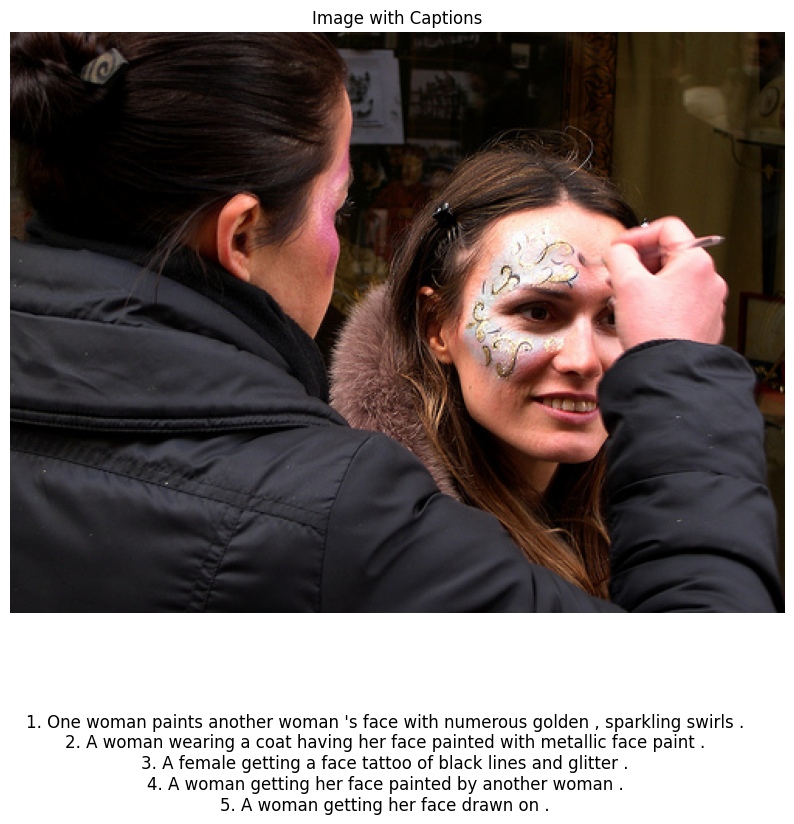

In [2]:
# Function to visualize an image with its captions
def visualize_image_with_captions(image_name):
    image_path = os.path.join(images_path, image_name)
    if os.path.exists(image_path):
        img = Image.open(image_path)
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title("Image with Captions")
        
        # Get captions for this image
        image_captions = captions[captions['image'] == image_name]['caption'].tolist()
        
        # Display captions
        caption_text = "\n".join([f"{i+1}. {cap}" for i, cap in enumerate(image_captions)])
        plt.figtext(0.5, 0.01, caption_text, wrap=True, horizontalalignment='center', fontsize=12)
        
        plt.show()
    else:
        print(f"Image {image_path} not found!")

# Visualize a random image with its captions
random_image = captions['image'].sample(1).values[0]
visualize_image_with_captions(random_image)

In [3]:
# Basic statistics
print(f"Total number of unique images: {captions['image'].nunique()}")
print(f"Average number of captions per image: {len(captions) / captions['image'].nunique():.2f}")

Total number of unique images: 31784
Average number of captions per image: 5.00


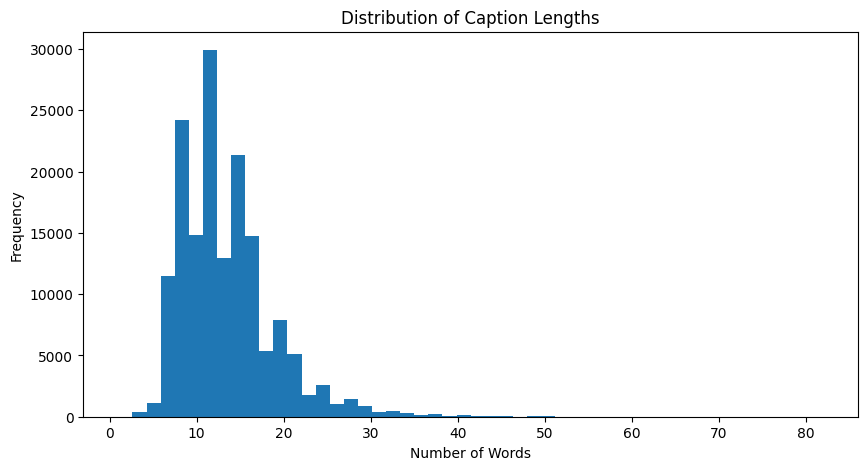

In [4]:
# Distribution of caption lengths
captions['caption_length'] = captions['caption'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 5))
plt.hist(captions['caption_length'], bins=50)
plt.title('Distribution of Caption Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

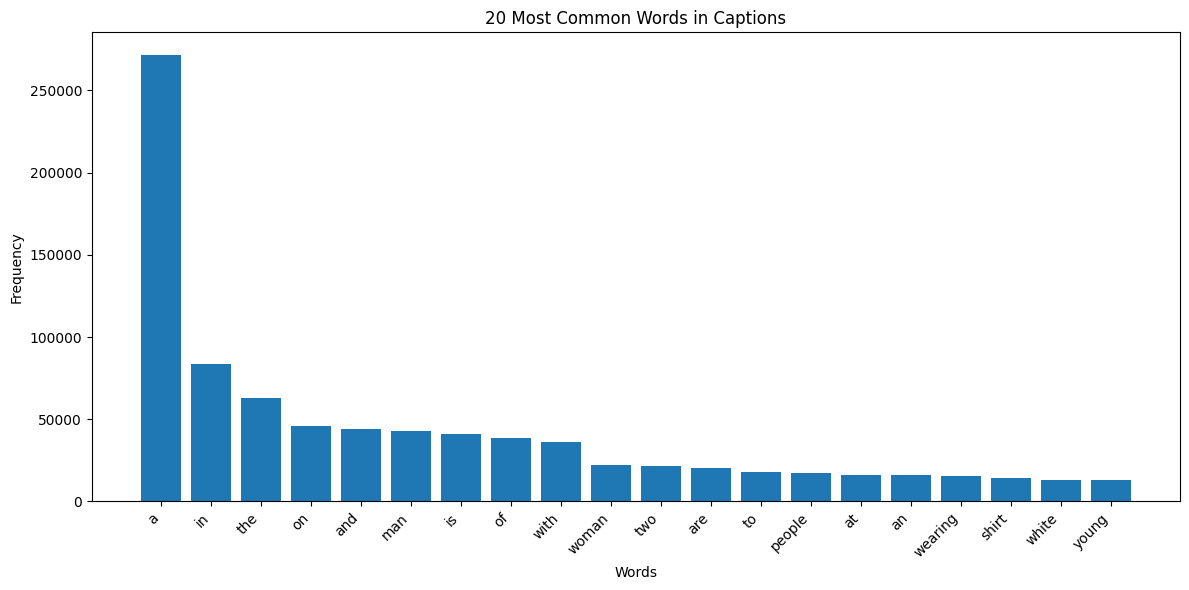

In [5]:
# Most common words in captions
def get_words(text):
    return re.findall(r'\w+', text.lower())

all_words = [word for caption in captions['caption'] for word in get_words(caption)]
word_freq = Counter(all_words)

plt.figure(figsize=(12, 6))
plt.bar(*zip(*word_freq.most_common(20)))
plt.title('20 Most Common Words in Captions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

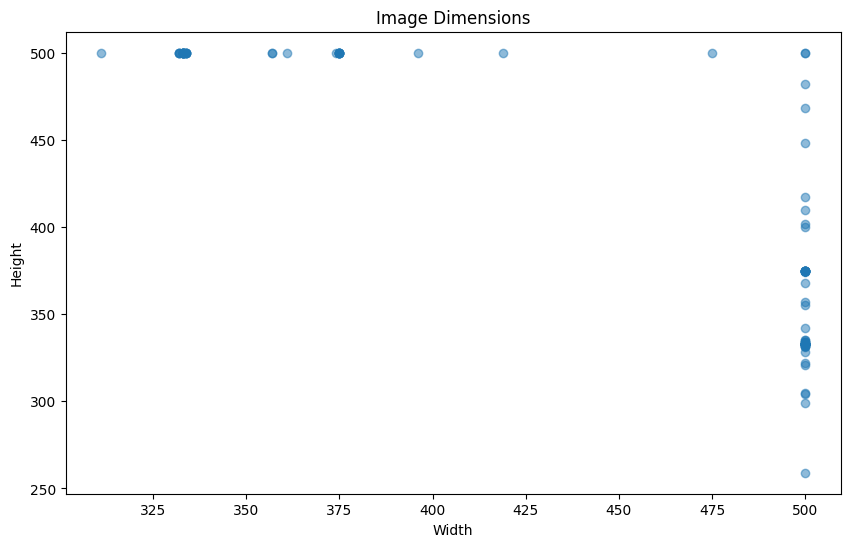

In [6]:
# Image analysis
image_sizes = []
color_distributions = []

for image_file in os.listdir(images_path)[:100]:  # Analyze first 100 images
    image_path = os.path.join(images_path, image_file)
    with Image.open(image_path) as img:
        image_sizes.append(img.size)
        img_array = np.array(img)
        if len(img_array.shape) == 3:  # Check if the image is colored
            color_dist = img_array.mean(axis=(0, 1))
            color_distributions.append(color_dist)

widths, heights = zip(*image_sizes)
plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Image Dimensions')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

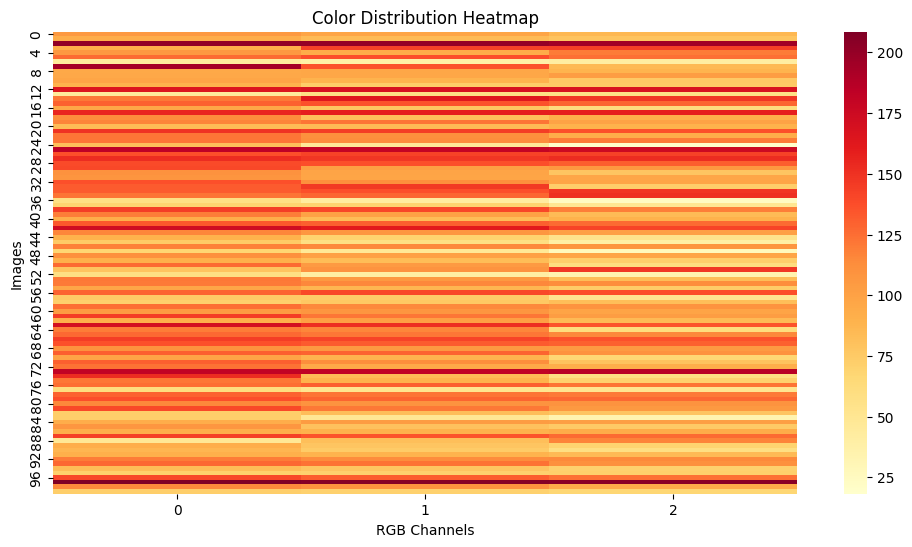

In [7]:
# Color distribution heatmap
if color_distributions:
    plt.figure(figsize=(12, 6))
    sns.heatmap(color_distributions, cmap='YlOrRd')
    plt.title('Color Distribution Heatmap')
    plt.xlabel('RGB Channels')
    plt.ylabel('Images')
    plt.show()

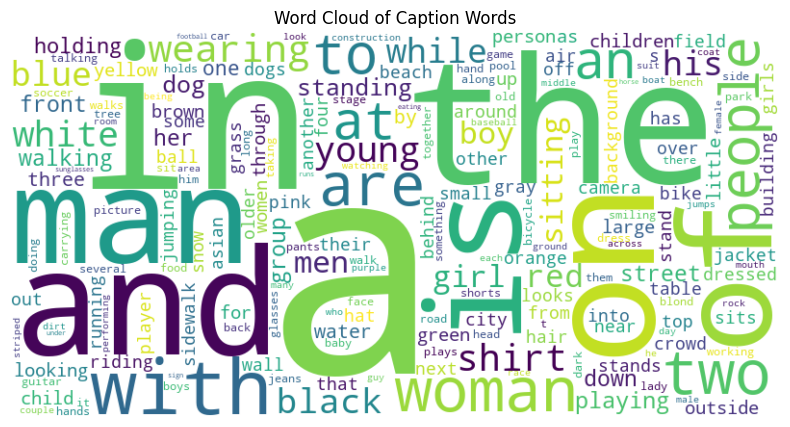

In [8]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Caption Words')
plt.show()

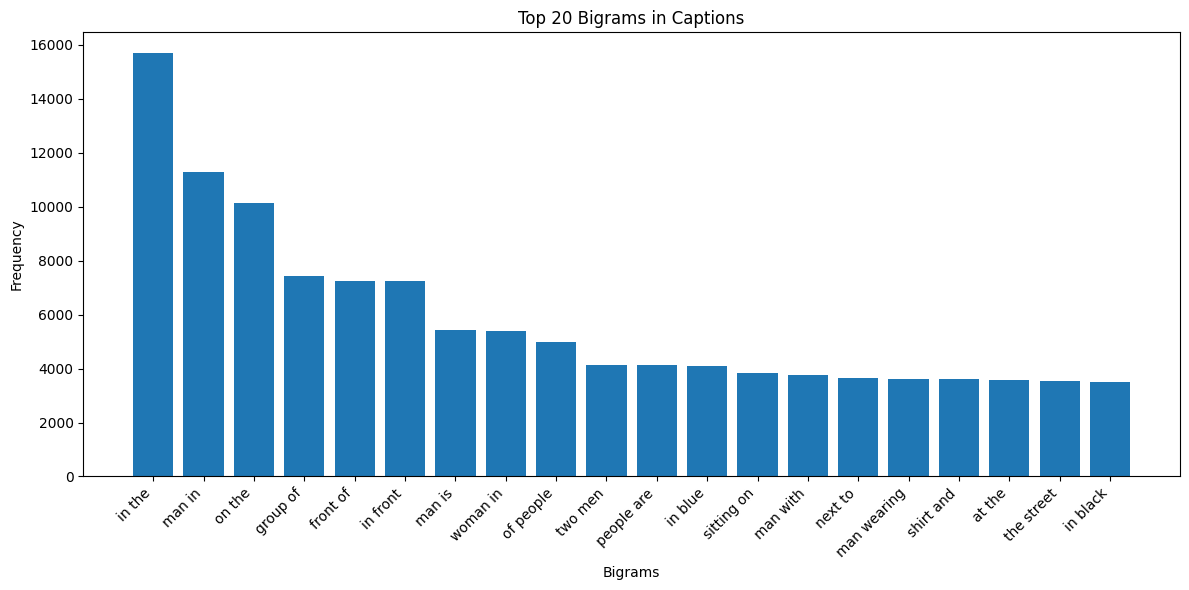

In [10]:
# N-gram analysis
vectorizer = CountVectorizer(ngram_range=(2, 2))
ngrams = vectorizer.fit_transform(captions['caption'])
ngram_counts = ngrams.sum(axis=0).A1
ngram_words = vectorizer.get_feature_names_out()
top_ngrams = sorted(zip(ngram_counts, ngram_words), reverse=True)[:20]

plt.figure(figsize=(12, 6))
plt.bar(range(20), [count for count, word in top_ngrams])
plt.xticks(range(20), [word for count, word in top_ngrams], rotation=45, ha='right')
plt.title('Top 20 Bigrams in Captions')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()